# 3.1 线性回归
- **目录**
  - 3.1.1 线性回归的基本元素
    - 3.1.1.1 线性模型
    - 3.1.1.2 损失函数
    - 3.1.1.3 解析解
  - 3.1.2 矢量化加速
  - 3.1.3 正态分布与平方损失
  - 3.1.4 从线性回归到深度网络

- 了解神经网络训练的基础知识，将介绍神经网络的整个**训练过程**， 包括：
  - 定义简单的神经网络架构
  - 数据处理
  - 指定损失函数
  - 如何训练模型。 
- 线性回归属于经典统计学习技术的一种，和softmax回归一起可以视为线性神经网络，适合机器学习入门，并为其他更复杂的技术奠定基础。
- **回归（regression）** 是能为一个或多个自变量与因变量之间关系建模的一类方法。
- 在自然科学和社会科学领域，**回归经常用来表示输入和输出之间的关系**。
- 当机器学习模型需要预测一个数值时，就会涉及到回归问题。
- 常见的例子包括：
  - 预测价格（房屋、股票等）
  - 预测住院时间（针对住院病人等）
  - 预测需求（零售销量等）  
- 预测除了回归问题外，还包括**分类问题**，比如Logistic回归和Probit回归等算法。

## 3.1.1 线性回归的基本元素
- **线性回归（linear regression）** 基于几个简单的假设：    
  - 首先，假设自变量$\mathbf{x}$和因变量$y$之间的关系是线性的，即$y$可以表示为$\mathbf{x}$中元素的**加权和**，这里通常允许包含观测值的一些噪声；  
  - 其次，需假设任何噪声都比较正常，如噪声遵循正态分布。  <br><br>
- 例子
  - 希望根据房屋的面积（平方英尺）和房龄（年）来估算房屋价格（美元）。
  - 为了开发一个能预测房价的模型，我们需要收集一个真实的数据集。这个数据集包括了房屋的销售价格、面积和房龄。 <br> <br>
- 机器学习术语：
  - 上述房屋数据集称为**训练数据集（training data set）**或**训练集（training set）**。
  - 每行数据（比如一次房屋交易相对应的数据）称为**样本（sample）**，也可以称为**数据点（data point）**或**数据样本（data instance）（准确翻译应该是数据实例）**。
  - 把试图预测的目标（比如预测房屋价格）称为**标签（label）**或**目标（target）**。
  - 预测所依据的自变量（面积和房龄）称为**特征（feature）**或**协变量（covariate）**。
  - $n$来表示数据集中的样本数。
  - 对索引为$i$的样本，其输入表示为$\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]^\top$，其对应的标签是$y^{(i)}$。

### 3.1.1.1 线性模型
- 线性假设是指**目标**（房屋价格）可以表示为**特征**（面积和房龄）的**加权和**，如下面的式子：
$$\mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b \tag{3.1.1}$$
  - $w_{\mathrm{area}}$和$w_{\mathrm{age}}$称为**权重（weight）**，权重决定了每个特征对我们预测值的影响。
  - $b$称为**偏置（bias）**、**偏移量（offset）**或**截距（intercept）**。偏置是指当所有特征都取值为0时，预测值应该为多少，该参数可以增强模型的表达能力。  
- 给定一个数据集，然后寻找模型的权重$\mathbf{w}$和偏置$b$，使得根据模型做出的预测**大体符合**数据里的真实价格。
- 输出的预测值由输入特征通过线性模型的**仿射变换**决定，仿射变换由所选权重和偏置确定。
  - 此处的仿射变换由一种**线性变换**（如旋转、缩放、剪切等）结合一个**平移变换**。
- 通俗理解就是：通过输入特征与权重（线性变换）和偏置（平移变换）进行矩阵乘法、向量点积等计算之后得出的结果。

- 在机器学习领域，通常使用的是**高维数据集**，建模时采用**线性代数表示法**会比较方便。
- 当输入包含$d$个特征时，将预测结果$\hat{y}$
（通常使用“尖角”符号表示$y$的估计值）表示为：

$$\hat{y} = w_1  x_1 + ... + w_d  x_d + b \tag{3.1.2}$$

- 将所有特征放到向量$\mathbf{x} \in \mathbb{R}^d$中，并将所有权重放到向量$\mathbf{w} \in \mathbb{R}^d$中，可以用**点积形式**来简洁地表达模型：
$$\hat{y} = \mathbf{w}^\top \mathbf{x} + b \tag{3.1.3}$$
向量$\mathbf{x}$对应于**单个数据样本**的特征。

- 用符号表示的矩阵$\mathbf{X} \in \mathbb{R}^{n \times d}$
可以很方便地引用整个数据集的$n$个样本。
  - 其中，$\mathbf{X}$的**每一行是一个样本**，**每一列是一种特征**。
- 对于特征集合$\mathbf{X}$，预测值$\hat{\mathbf{y}} \in \mathbb{R}^n$
可以通过矩阵-向量乘法表示为：
$${\hat{\mathbf{y}}} = \mathbf{X} \mathbf{w} + b \tag{3.1.4}$$
- 这个过程中的求和将使用**广播机制**，即偏置$b$需要广播。
- 给定训练数据特征$\mathbf{X}$和对应的已知标签$\mathbf{y}$，线性回归的目标是找到一组权重向量$\mathbf{w}$和偏置$b$：
  - 当给定从$\mathbf{X}$的**同分布**中取样的新样本特征时，这组权重向量和偏置能够使得新样本预测标签的**误差尽可能小**。

- 在开始寻找最好的**模型参数（model parameters）** $\mathbf{w}$和$b$之前，还需要两个东西：
  - 一种模型好坏的**度量**（或测量）方式。
  - 一种能够**更新**模型以**提高**模型预测质量的方法。

### 3.1.1.2 损失函数
- 考虑如何用模型**拟合（fit）** 数据之前，需要确定一个**拟合程度的度量**。
  - **损失函数（loss function）**能够量化目标的**实际**值与**预测**值之间的差距。
- 通常会选择**非负数**作为损失，且数值越小表示损失越小，完美预测时的损失为0。
  - 回归问题中最常用的损失函数是**平方误差函数**。
  - 当样本$i$的预测值为$\hat{y}^{(i)}$，其相应的真实标签为$y^{(i)}$时，平方误差可以定义为以下公式：
$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2 \tag{3.1.5}$$
- 为一维情况下的回归问题绘制图像，如下图所示。
<center><img src=../img/fit-linreg.svg/ ></center>
<center>图3.1.1 用线性模型拟合数据</center>
- 为了度量模型在整个数据集上的优劣，需计算在训练集 **$n$个样本上的损失均值** （也等价于求和）：
$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2 \tag{3.1.6}$$
- 在训练模型时，希望寻找一组参数（$\mathbf{w}^*, b^*$），这组参数能**最小化在所有训练样本上的总损失**。如下式：
  $$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b) \tag{3.1.7}$$

-----
- **说明：为何选择非负数作为损失？**
  - 直观性和可解释性。非负的损失值更加直观,0表示完美预测,正值表示有误差。这种表示方式更容易理解和解释。
  - 数学便利性。非负损失函数在优化过程中更容易处理,可以避免一些数学上的复杂性。
  - 避免抵消。如果允许正负损失,不同样本的正负损失可能会相互抵消,掩盖了真实的预测误差。
  - 单调性。非负损失保证了损失与误差大小的单调关系,误差越大损失越大,这符合我们的直觉。
  - 稳定性。非负损失函数通常具有更好的数值稳定性,不容易出现数值溢出等问题。
  - 凸优化。许多常用的非负损失函数(如平方损失)是凸函数,有利于优化算法的收敛。
  - 概率解释。某些非负损失函数可以从概率的角度进行解释,与统计学习理论更好地结合。
-----------
  

### 3.1.1.3 解析解

- 线性回归刚好是一个很简单的优化问题。
- 线性回归的解可以用一个公式简单地表达出来，这类解叫作**解析解（analytical solution）** 。
  - 首先将偏置$b$合并到参数$\mathbf{w}$中，合并方法是在包含所有**参数的矩阵中附加一列**。
  - 预测问题是最小化$\|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2$，在损失平面上只有一个临界点，这个临界点对应于整个区域的**损失极小点**。
  - 将损失关于$\mathbf{w}$的导数设为0，得到解析解：
$$\mathbf{w}^* = (\mathbf X^\top \mathbf X)^{-1}\mathbf X^\top \mathbf{y}.\tag{3.1.8}$$
  - 线性回归 问题存在解析解，但并不是所有的问题都存在解析解。
    - 解析解可以进行很好的数学分析，但解析解对问题的限制很严格，导致它无法广泛应用在深度学习里。
- 多元线性回归模型的原理详解可参看[此视频](https://www.bilibili.com/video/BV1oa411A7MN/?vd_source=f229b48b5ab83786d3217870304efe4d)，该视频的代码在[此处](https://github.com/jinhualee/datashine/blob/master/statsmodels_ols.ipynb)。

### 3.1.1.4 随机梯度下降
- **梯度下降（gradient descent）** 的方法，这种方法几乎可以优化所有深度学习模型。
  - 该方法通过不断地**在损失函数递减的方向上更新参数**来降低误差。
- 梯度下降最简单的用法是计算损失函数（数据集中**所有**样本的损失均值）关于模型参数的**导数**（在这里也可以称为梯度）。
  - 但实际中的执行可能会非常慢：因为在每一次更新参数之前，必须遍历整个数据集。
- 通常会在每次需要计算更新的时候随机抽取一小批样本，这种变体叫做**小批量随机梯度下降**（minibatch stochastic gradient descent），可以克服梯度下降方法的计算性能缺陷。其计算原理如下：
  - 在每次迭代中，首先随机抽样一个小批量$\mathcal{B}$，它是由固定数量的训练样本组成的。
  - 然后计算**小批量的平均损失**关于模型参数的导数（也可以称为梯度）。
  - 最后将梯度乘以一个预先确定的正数$\eta$，并从当前参数的值中减掉。
  - 表示这一更新过程（$\partial$表示偏导数）如下：

$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b) \tag{3.1.9}$$

- 总结一下，算法的步骤如下：
  - 初始化模型参数的值，如随机初始化。
  - 从数据集中随机抽取小批量样本且在负梯度的方向上更新参数，并不断迭代这一步骤。

- 参数更新包括权重和偏置的更新，过程可写成如下形式:

  $$\begin{aligned} \mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned} \tag{3.1.10}$$

  - $\mathbf{w}$和$\mathbf{x}$都是向量。在这里，更优雅的**向量表示法**比**系数表示法**（如$w_1, w_2, \ldots, w_d$）更具可读性。
  - $|\mathcal{B}|$表示每个小批量中的样本数，这也称为**批量大小（batch size）**。
  - $\eta$表示**学习率（learning rate）**。
  - 批量大小和学习率的值通常是手动预先指定，而不是通过模型训练得到的。
  - 这些可以调整但不在训练过程中更新的参数称为**超参数（hyperparameter）**。
  - **调参（hyperparameter tuning）** 是选择超参数的过程。
    - 超参数通常是根据训练迭代结果来调整的，
    - 训练迭代结果是在独立的**验证数据集（validation dataset）** 上评估得到的。

- 训练结果称为模型参数的估计值，表示为$\hat{\mathbf{w}}, \hat{b}$。

- 将$\hat{\mathbf{w}}, \hat{b}$参数用于预测测试数据集或重新收集的数据集上，并对预测结果进行评估，这个过程称之为**泛化（generalization）**。

- 有些模型使用训练得出的参数在训练数据集上表现良好但是在测试数据集上表现很差，此现象就称之为“过拟合”。

- 用模型进行预测

  - 给定“已学习”的线性回归模型$\hat{\mathbf{w}}^\top \mathbf{x} + \hat{b}$，现在可以通过房屋面积$x_1$和房龄$x_2$来**估计**一个（未包含在训练数据中的）新房屋价格。

  - 给定特征，然后估计目标的过程通常称为**预测（prediction）**。

## 3.1.2 矢量化加速

- **所谓矢量化加速，就是对计算进行矢量化，从而利用线性代数库，而不是在Python中编写开销高昂的for循环**。

- PyTorch使用到了以下几个矢量计算的线性代数库：

  - BLAS（Basic Linear Algebra Subprograms）：BLAS是一组基本的线性代数子程序，提供了矩阵乘法、向量乘法等常用的线性代数操作。PyTorch中的torch.mm()和torch.mv()函数就是基于BLAS实现的。

  - LAPACK（Linear Algebra PACKage）：LAPACK是一个高性能的线性代数库，提供了求解线性方程组、特征值和特征向量等高级线性代数运算。在PyTorch中，torch.eig()和torch.solve()函数就是基于LAPACK实现的。

  - cuBLAS（CUDA Basic Linear Algebra Subprograms）：cuBLAS是NVIDIA开发的针对GPU加速的BLAS库，提供了高效的矩阵乘法、向量乘法等操作。在PyTorch中，如果安装了CUDA并且使用GPU时，torch.mm()和torch.mv()函数会自动调用cuBLAS来进行加速。

  - cuSOLVER（CUDA Solver Library）：cuSOLVER是NVIDIA开发的针对GPU加速的线性代数库，提供了求解线性方程组、特征值和特征向量等高级线性代数运算。在PyTorch中，如果安装了CUDA并且使用GPU时，torch.eig()和torch.solve()函数会自动调用cuSOLVER来进行加速。
  
  - MAGMA：MAGMA 是一个用于多核 CPU 和 GPU 的线性代数库，它提供了类似 LAPACK 的功能，并利用异构计算设备实现高性能。PyTorch 可以通过使用 MAGMA 支持更复杂的线性代数操作。

In [1]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

- 然后实例化两个全为1的10000维向量，然后实现和比较**向量相加的两种方法**：
  - 一种方法使用Python的for循环遍历向量；
  - 另一种方法中依赖对`+`的调用。


In [4]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

- 定义一个计时器：


In [5]:
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

对工作负载进行**基准测试**：

- 首先**使用for循环，每次执行一位的加法**：


In [7]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.33370 sec'

- **然后使用重载的`+`运算符来计算按元素的和**：


In [8]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00000 sec'

- 结果很明显，第二种方法比第一种方法快得多。
- 矢量化代码通常会带来数量级的加速。-

## 3.1.3 正态分布与平方损失

- 正态分布和线性回归之间的关系很密切。
- **正态分布（normal distribution）**，也称为**高斯分布（Gaussian distribution）**。

- 简单的说，若随机变量$x$具有均值$\mu$和方差$\sigma^2$（标准差$\sigma$），其正态分布概率密度函数如下：

$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right). \tag{3.1.11}$$


In [9]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

- **可视化正态分布**：


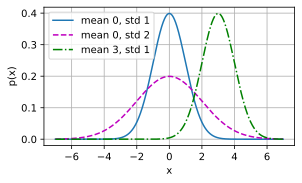

In [10]:
# 再次使用numpy进行可视化
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

- **均方误差损失函数**（简称均方损失）可以用于线性回归的一个原因是：
  - 假设了观测中包含噪声，其中噪声服从正态分布。
  - 噪声正态分布如下式:
$$y = \mathbf{w}^\top \mathbf{x} + b + \epsilon,$$
  - 其中，$\epsilon \sim \mathcal{N}(0, \sigma^2) \tag{3.1.12}$。

- 然后写出通过给定的$\mathbf{x}$观测到特定$y$的**似然（likelihood）**：

$$P(y \mid \mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right). \tag{3.1.13}$$

- 根据**极大似然估计法（Maximum Likelihood Estimation,MLE）**，参数$\mathbf{w}$和$b$的最优值是使整个数据集的**似然**最大的值：
$$P(\mathbf y \mid \mathbf X) = \prod_{i=1}^{n} p(y^{(i)}|\mathbf{x}^{(i)}). \tag{3.1.14}$$ 根据极大似然估计法选择的估计量称为**极大似然估计量**。
- 可以在不改变目标的前提下，通过最大化似然**对数**来简化极大似然法的乘法运算。
- 同时由于优化通常是说最小化而不是最大化，可以改为**最小化负对数似然**：$-\log P(\mathbf y \mid \mathbf X)$。
- 由此可以得到的数学公式如下：
$$-\log P(\mathbf y \mid \mathbf X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2. \tag{3.1.15}$$
  
  - 如此只需要假设$\sigma$是某个固定常数就可以忽略第一项，因为第一项不依赖于$\mathbf{w}$和$b$。
  - 现在第二项除了常数$\frac{1}{\sigma^2}$外，其余部分和前面介绍的均方误差是一样的。
  - 上面式子的解并不依赖于$\sigma$。

- 负对数似然损失函数关于参数$\mathbf{w}$和$b$的梯度如下（具体推导过程见后）：
  $$
\frac{\partial}{\partial \mathbf{w}} (-\log P(\mathbf y \mid \mathbf X)) = -\frac{1}{\sigma^2} \sum_{i=1}^n \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right) \mathbf{x}^{(i)}. \tag{3.1.16}
$$

$$
\frac{\partial}{\partial b} (-\log P(\mathbf y \mid \mathbf X)) = -\frac{1}{\sigma^2} \sum_{i=1}^n \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right).\tag{3.1.17}
$$

- 也可以求解负对数似然函数对误差标准差$\sigma$的梯度：
  $$
\frac{\partial}{\partial \sigma} \left( -\log P(\mathbf y \mid \mathbf X) \right) = \frac{n}{\sigma} - \frac{1}{\sigma^3} \sum_{i=1}^n R_i^2.\tag{3.1.18}
$$
  其中$ R_i$表示误差：
  $$\sum_{i=1}^n R_i^2 = \sum_{i=1}^n{(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b)^2}. \tag{3.1.19}$$
- 因此，**在高斯噪声的假设下，最小化均方误差等价于对线性模型的极大似然估计。**
  - 通俗点讲，线性回归分析的参数估计方法中，极大似然法与最小二乘法的推导结果是一致的。 

-----------------
- **说明：何为"似然"？"**
  - **似然（Likelihood）** 是一个统计学的概念，用于衡量在给定某些参数值下，观测到某个样本数据的“**可能性**”有多大。
    - 即这个样本数据来自这个模型的“可能性”有多大。
  - 具体来说，假设一个模型，它具有一些未知参数，现在可以根据观测到的数据去推测这些参数的值，以使数据在这个模型下出现的可能性最大。
  - 比如上述例子中，这个模型就是线性回归模型，参数就是权重 $\mathbf{w}$和偏置$b$，现在的目标就是估计这些参数。
  - “极大似然估计法”可以承担这项工作：
    - “似然”在这里的意思就是在**给定参数值**下，**数据出现的概率**。
    - 而“极大似然”则是一种寻找参数的方法，使得数据在这个参数下出现的“似然”最大。
    - 换句话说，就是找到一组权重和偏置，使得所有的样本数据的标签$y$ 在模型的输出下出现的“可能性”最大。
  - 但是，在实际的优化过程中，为了简化计算，通常使用“负对数似然”作为优化目标，原因有两点:
    - 一是因为对数似然转化后，似然的连乘操作可以转换成求和，计算性能更好。
    - 二是在优化的过程中，通常做法是**最小化**目标函数，所以取负值。
  - 最后可以发现，若假设噪声遵循高斯分布或正态分布，那在这个假设下，最小化均方误差和极大似然估计实际上是等价的。
    - 因为在这种特定的情况下，均方误差的最小化就实际上等于了最大化这个数据在参数下的似然。
    - 也就是说，使得**均方误差最小**的那组参数，也是使得**数据出现的可能性最大**的那组参数。


Iteration 0: w=2.0976, b=3.0024, std=9.2441
Iteration 100: w=2.8999, b=4.0699, std=1.0090
Iteration 200: w=3.2199, b=3.8983, std=1.0037
Iteration 300: w=3.2297, b=3.8931, std=1.0037
Iteration 400: w=3.2300, b=3.8930, std=1.0037
Iteration 500: w=3.2300, b=3.8929, std=1.0037
Iteration 600: w=3.2300, b=3.8929, std=1.0037
系数w估计值: 3.2300, 截距b估计值: 3.8929, 残差标准差估计值: 1.0037


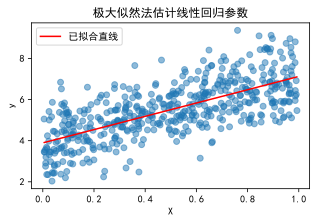

In [11]:
# 极大似然法&负对数似然函数的应用示例
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# 生成模拟数据，暂时使用一元函数
X = np.random.rand(500, 1) # X是均匀分布的
y = 4 + 3 * X + np.random.randn(500, 1) # 均匀分布的线性变换加上高斯噪声

def gradient(params, X, y):
    """计算负对数似然函数的梯度"""
    w, b, std = params
    n = len(y)
    y_pred = w * X + b
    residuals = y - y_pred # 误差（统计学教材多翻译成"残差"）
    
    dw = -np.sum(residuals * X) / (std ** 2) #公式3.1.16
    db = -np.sum(residuals) / (std ** 2) # 公式3.1.17
    dstd = n / std - np.sum(residuals**2) / (std**3) # 公式3.1.18，标准差的梯度，不参与模型优化求解
    
    return np.array([dw, db, dstd])

def gradient_descent(X, y, learning_rate=0.001, num_iterations=10000, tolerance=1e-10):
    """梯度下降优化"""
    params = np.array([1.0, 1.0, 1.0])  # 初始化参数
    
    for i in range(num_iterations):
        grad = gradient(params, X, y)
        
        # 梯度裁剪
        grad = np.clip(grad, -1e5, 1e5)

        # 梯度下降
        new_params = params - learning_rate * grad
        
        # 确保标准差不为负
        new_params[2] = max(new_params[2], 1e-6)
        
        if np.all(np.abs(new_params - params) < tolerance):
            break
        
        params = new_params
        
        # 自适应学习率，学习率逐步降低
        learning_rate *= 0.9999
        
        if i % 100 == 0:
            print(f"Iteration {i}: w={params[0]:.4f}, b={params[1]:.4f}, std={params[2]:.4f}")
    
    return params

# 运行梯度下降
optimal_params = gradient_descent(X, y)
# 提取w,b参数和残差标准差
w_opt, b_opt, std_opt = optimal_params
print(f"系数w估计值: {w_opt:.4f}, 截距b估计值: {b_opt:.4f}, 残差标准差估计值: {std_opt:.4f}")

# 绘制结果
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
plt.figure(figsize=(5, 3))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, w_opt * X + b_opt, color='red', label='已拟合直线')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('极大似然法估计线性回归参数')
plt.show()

In [13]:
X[0:10],X.shape

(array([[0.37454012],
        [0.95071431],
        [0.73199394],
        [0.59865848],
        [0.15601864],
        [0.15599452],
        [0.05808361],
        [0.86617615],
        [0.60111501],
        [0.70807258]]),
 (500, 1))

## 3.1.4 从线性回归到深度网络
- 下图将线性回归模型通过**层**概念描述为一个神经网络。
- 需要注意的是，该图只显示**连接模式**，即只显示每个输入如何连接到输出，隐去了权重和偏置的值。
<center><img src='../img/singleneuron.svg'></center>
<center>图3.1.2 线性回归是一个单层神经网络</center>
- 在神经网络中，输入为$x_1, \ldots, x_d$，因此输入层中的**输入数**（或称为**特征维度，feature dimensionality**）为$d$。
- 网络的输出为$o_1$，因此输出层中的**输出数**是1。
  - 需要注意的是，输入值都是已经给定的，并且只有一个**计算神经元**。
- 由于模型重点在发生计算的地方，所以通常我们在计算层数时不考虑输入层。上图中的神经网络的**层数**为1。
- 可以将线性回归模型视为仅由单个人工神经元组成的神经网络，或称为**单层神经网络**。

- 对于线性回归，每个输入都与每个输出（在本例中只有一个输出）相连，这种变换又被称为**全连接层（fully-connected layer）**或称为**稠密层（dense layer）**。

- **说明：全连接层与稠密层**
  - 深度学习神经网络中的“全连接层”和“稠密层”实际上是同一个概念的两种不同说法。
  - **全连接层:**
    - 全连接层是传统神经网络中最常见的一种层，它的特点是该层中的每个神经元都与前一层的所有神经元相连。
    - 在全连接层中，每个神经元的输出是前一层所有神经元输出的加权和，加上一个偏置项。
    - 权重和偏置是该层可以学习的参数。
    - 全连接层通常用于神经网络的最后几层，用于整合特征并输出最终的预测结果。
  - **稠密层:**
    - “稠密层”这个术语通常用于深度学习框架中，如TensorFlow和Keras，它指的是实际上是全连接层的一个实现。
    - 在Keras框架中，Dense 是全连接层的一个类。当你添加一个 Dense 层到模型中时，你正在添加一个全连接层。
    - 和全连接层一样，稠密层的每个神经元接收前一层所有神经元的输出作为输入。
  - **区别与联系:**
    - 从实际意义上讲，没有区别。两者的功能和作用是一样的。"全连接层"是一个更通用的术语，而"稠密层"通常与特定的深度学习库（如Keras）的API调用相关。
    - 在实践中，当人们提到全连接层时，他们可能是在讨论网络的架构；而当提到稠密层时，他们可能是在讨论如何在某个具体的深度学习框架中实现这一层。

--------------

## 小结

* 机器学习模型中的关键要素是训练数据、损失函数、优化算法，还有模型本身。
* 矢量化使数学表达上更简洁，同时运行的更快。
* 最小化目标函数和执行极大似然估计等价。
* 线性回归模型也是一个简单的神经网络。

- **说明：公式3.1.5中负对数似然损失函数关于参数w和b的梯度推导过程**
  - 为了求解负对数似然函数关于 $\mathbf{w}$ 和 $b$ 的梯度，我们可以对给定的负对数似然函数进行求导。给定的负对数似然函数为：
    $$
-\log P(\mathbf y \mid \mathbf X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2.
    $$
    分别对 $\mathbf{w}$ 和 $b$ 求梯度。

  - $\mathbf{w}$的梯度
    - 首先对 $\mathbf{w}$ 求导。在求导过程中，常数项可以忽略，因为它们对梯度没有贡献，关注的是以下部分：
      $$
\sum_{i=1}^n \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2.
      $$
      令 $L(\mathbf{w}, b) = \sum_{i=1}^n \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2$，于是有：
      $$
\frac{\partial L}{\partial \mathbf{w}} = \sum_{i=1}^n \frac{\partial}{\partial \mathbf{w}} \left[ \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2 \right].
      $$

    - 使用链式法则，首先对内层的平方项求导：
      $$
\frac{\partial}{\partial \mathbf{w}} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2 = 2 \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right) \cdot \frac{\partial}{\partial \mathbf{w}} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right).
      $$

    - 对 $\mathbf{w}$ 求导：
      $$
\frac{\partial}{\partial \mathbf{w}} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right) = -\mathbf{x}^{(i)}.
      $$

    - 结合起来得到：
      $$
\frac{\partial}{\partial \mathbf{w}} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2 = -2 \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right) \mathbf{x}^{(i)}.
      $$
      将其代入之前的梯度表达式中，并结合 $\frac{1}{2 \sigma^2}$ 的系数：
      $$
\frac{\partial L}{\partial \mathbf{w}} = \sum_{i=1}^n \frac{1}{2 \sigma^2} \cdot (-2) \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right) \mathbf{x}^{(i)} = \sum_{i=1}^n -\frac{1}{\sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right) \mathbf{x}^{(i)}.
      $$
      因此，关于 $\mathbf{w}$ 的梯度为：
      $$
\frac{\partial}{\partial \mathbf{w}} (-\log P(\mathbf y \mid \mathbf X)) = -\frac{1}{\sigma^2} \sum_{i=1}^n \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right) \mathbf{x}^{(i)}.
      $$

  - $b$ 的梯度
    - 关注部分仍然是：
        $$
\sum_{i=1}^n \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2.
        $$
        令 $L(\mathbf{w}, b) = \sum_{i=1}^n \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2$。
    - 具体步骤如下：
        $$
\frac{\partial L}{\partial b} = \sum_{i=1}^n \frac{\partial}{\partial b} \left[ \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2 \right].
        $$
      - 使用链式法则，首先对内层的平方项求导：
        $$
\frac{\partial}{\partial b} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2 = 2 \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right) \cdot \frac{\partial}{\partial b} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right).
        $$
      - 对 $b$ 求导：
        $$
\frac{\partial}{\partial b} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right) = -1.
        $$
      - 结合起来得到：
      $$
\frac{\partial}{\partial b} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2 = -2 \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right).
      $$
    - 将其代入之前的梯度表达式中，并结合 $\frac{1}{2 \sigma^2}$ 的系数：
      $$
\frac{\partial L}{\partial b} = \sum_{i=1}^n \frac{1}{2 \sigma^2} \cdot (-2) \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right) = \sum_{i=1}^n -\frac{1}{\sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right).
      $$
    - 因此，关于 $b$ 的梯度为：
      $$
\frac{\partial}{\partial b} (-\log P(\mathbf y \mid \mathbf X)) = -\frac{1}{\sigma^2} \sum_{i=1}^n \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right).
      $$

  - 负对数似然函数关于 $\mathbf{w}$ 和 $b$ 的梯度分别为：
$$
\frac{\partial}{\partial \mathbf{w}} (-\log P(\mathbf y \mid \mathbf X)) = -\frac{1}{\sigma^2} \sum_{i=1}^n \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right) \mathbf{x}^{(i)},
$$

$$
\frac{\partial}{\partial b} (-\log P(\mathbf y \mid \mathbf X)) = -\frac{1}{\sigma^2} \sum_{i=1}^n \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right).
$$


----------